#In this beginners project ,we are going to predict the species of iris flower using classification algorithms.
We have a dataset which contains the petal length and width and sepal length and width of different iris flowers.
We are going to use svm ,logistic regression, Decision tree and KNN to predict the iris species.
Lets go.#

In [1]:
#import required modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
#read the file
df=pd.read_csv(r'Downloads\Iris (1).csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [93]:

#Getting the info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [94]:
#type of columns
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [95]:
#unique values of target columns


df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [96]:
df.drop('Id',axis=1,inplace=True)

In [97]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


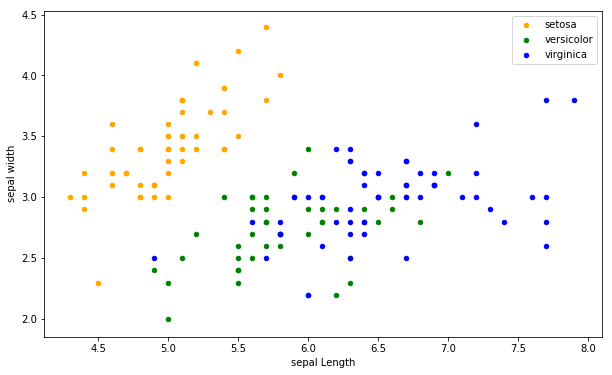

In [98]:
#scatter plots to see distribution of species on the basis of sepal length and width
fig= df[df.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange',label='setosa')
df[df.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green',label='versicolor',ax=fig)
df[df.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue',label='virginica',ax=fig)

fig.set_xlabel('sepal Length')
fig.set_ylabel('sepal width')
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()









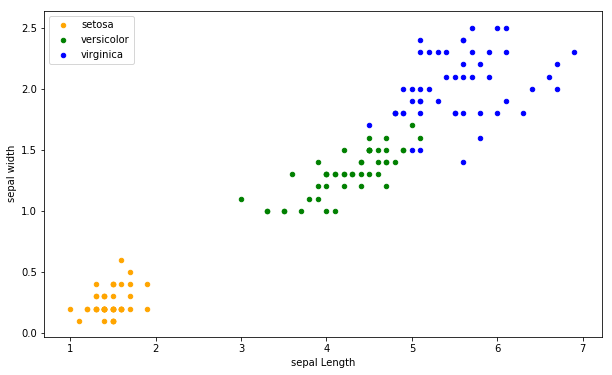

In [99]:
#scatter plots to see distribution of species on the basis of petal length and width
fig= df[df.Species=='Iris-setosa'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='orange',label='setosa')
df[df.Species=='Iris-versicolor'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='green',label='versicolor',ax=fig)
df[df.Species=='Iris-virginica'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='blue',label='virginica',ax=fig)

fig.set_xlabel('petal Length')
fig.set_ylabel('petal width')
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()


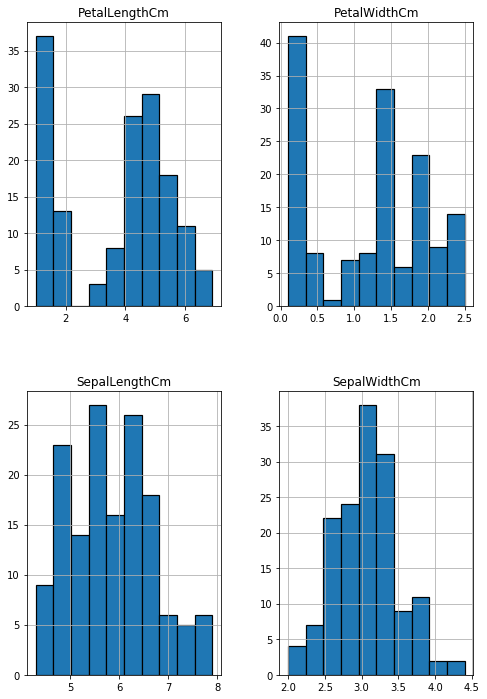

In [100]:
df.hist(edgecolor='black',linewidth=1.2,figsize=(8,12))
plt.gcf()
plt.show()

C:\Users\Thor\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


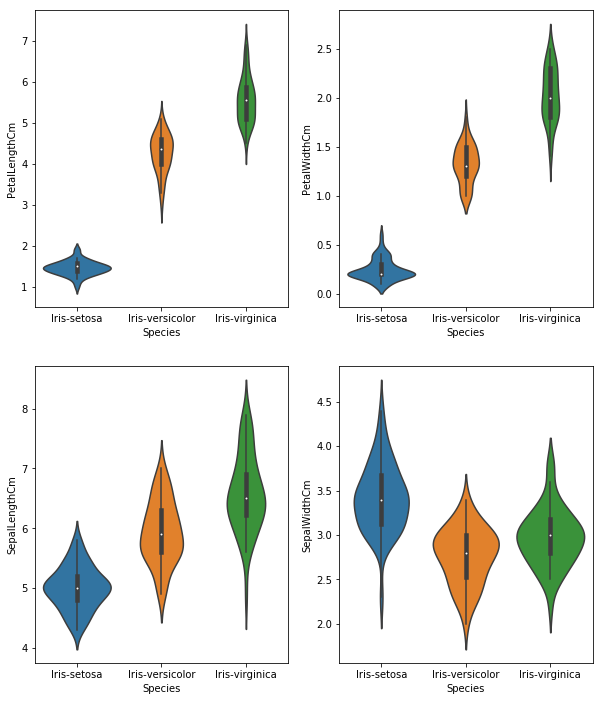

In [101]:
#plot violin plots to see the distribution more accurately

plt.figure(figsize=(10,12))

plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=df)

In [133]:
#import modules for modeling

from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [134]:
df.shape

(150, 5)

In [135]:
#check the correlation between feature variables, the high correlated values should be dropped in order to have a good performance
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


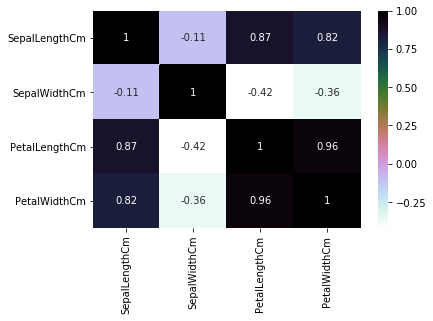

In [136]:
#visualize the correlation using heatmap

sns.heatmap(df.corr(),annot=True,cmap='cubehelix_r')

In [137]:
#get the feature dataset
X=df.drop('Species',axis=1)
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [138]:
#predict variable
y=df['Species']
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [139]:
#use train test split 

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [130]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


In [119]:
#fit the data toa an svm model
model=svm.SVC()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [140]:
print('the model accuracy is :', metrics.accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

the model accuracy is : 1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

    avg / total       1.00      1.00      1.00        45

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [165]:
#fit the data to an logistic regression model
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_lr=lr.predict(X_test)
print('the model accuracy is :', metrics.accuracy_score(y_lr,y_test))

the model accuracy is : 0.9777777777777777


In [166]:
#fit the data to an Decision tree model

model=DecisionTreeClassifier()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,y_test))


The accuracy of the Decision Tree is 1.0


In [167]:
#cluster the data using KNN and get the best value of K

kn=KNeighborsClassifier(n_neighbors=3)
kn.fit(X_train,y_train)
y_kn=kn.predict(X_test)
print('the model accuracy is :', metrics.accuracy_score(y_kn,y_test))

the model accuracy is : 1.0


In [168]:
n=list(range(10))

In [169]:
accuracy=[]
for i in list(range(1,11)):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_knn=knn.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_knn,y_test))
print(accuracy)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


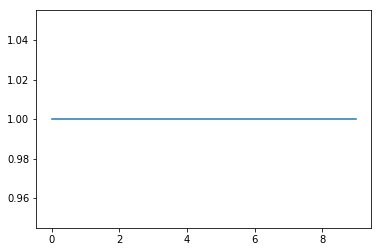

In [170]:
plt.plot(accuracy)